In [1]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

project_folder = "example_data"


# Small subset of data from CASA simulation

['1d239e14-eaeb-48fb-83a2-ea4874cf1888'
 'bea54fb6-9e30-4a8c-b0f5-4427d0301130'
 '5a1b25e3-7cb1-475a-b2c0-21fb758f7b14'
 '64ed7f0e-9482-42f4-8c68-89bdeeccc4b0'
 'a591885c-f2a1-4868-bd30-40ac174682b4'
 '3ebcf56f-54d6-428d-9fc7-d64b0b034216'
 '9e45e62f-8864-441c-8dd3-cae6473f5488'
 '788e30df-ffd8-457d-a706-e12780ece77a'
 'd00bf4d1-dd04-4fb8-89e7-53ebaf8021c0'
 '9efc20bb-8fd5-4b67-ab27-681e917bc48b']
{'1d239e14-eaeb-48fb-83a2-ea4874cf1888': {'RA': 149.94790777218412, 'DEC': 2.7927841139825147}, 'bea54fb6-9e30-4a8c-b0f5-4427d0301130': {'RA': 150.59255463500716, 'DEC': 1.6109679116791966}, '5a1b25e3-7cb1-475a-b2c0-21fb758f7b14': {'RA': 150.54973052792846, 'DEC': 1.9582921598048126}, '64ed7f0e-9482-42f4-8c68-89bdeeccc4b0': {'RA': 150.60606955580624, 'DEC': 1.9034995500391212}, 'a591885c-f2a1-4868-bd30-40ac174682b4': {'RA': 149.86316871291524, 'DEC': 1.6402446870692144}, '3ebcf56f-54d6-428d-9fc7-d64b0b034216': {'RA': 150.4683621503234, 'DEC': 2.235540840734198}, '9e45e62f-8864-441c-8dd3-cae64

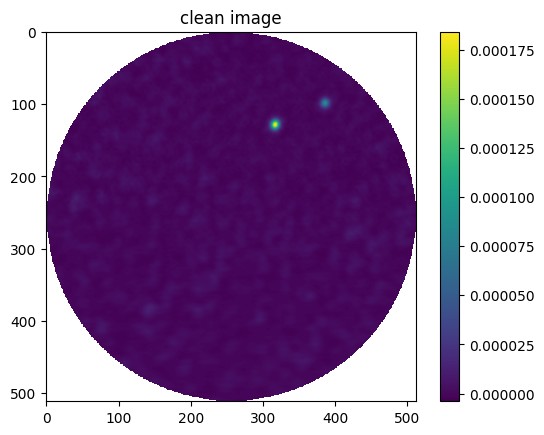

dirty image
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


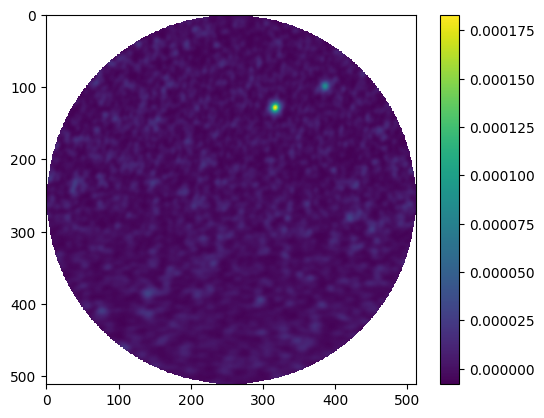

In [10]:
folder = "test_data"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
print(sky_keys)
print(phase_centers)
print()
clean = np.load(f"{project_folder}/{folder}/true/00000.npy")
plt.title("clean image")
print(clean)
plt.imshow(clean)
plt.colorbar()
plt.show()

dirty = np.load(f"{project_folder}/{folder}/dirty/00000.npy")
print("dirty image")
print(dirty)
plt.imshow(dirty)
plt.colorbar()
plt.show()

dirty image :


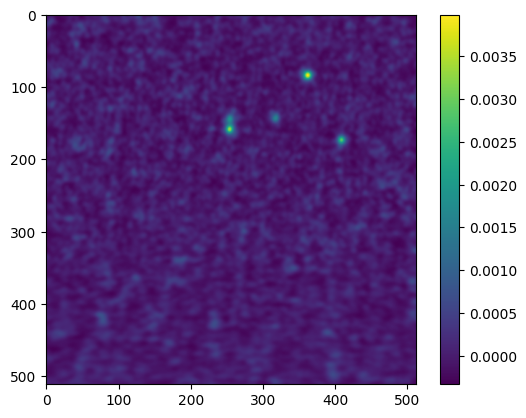

key : eb0dc461-5bcd-410c-b4a6-69590b5a510a
phase_centers : {'RA': 150.3506898270436, 'DEC': 2.076351921985916}


In [9]:
folder = "test_data"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
for i, key in enumerate(sky_keys[:2]):
    dirty = np.load(f"{project_folder}/{folder}/dirty/{i:05}.npy")
    print("dirty image :")
    plt.imshow(dirty)
    plt.colorbar()
    plt.show()
    print(f"key : {key}")
    print(f"phase_centers : {phase_centers[key]}")

In [10]:
folder = "test_data"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
sky_sources_snr_extended = np.load(f"{project_folder}/{folder}/sky_sources_snr_extended.npy", allow_pickle=True).item()    
snr = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
print(sky_keys)
print(phase_centers)
for i, key in enumerate(sky_keys[:2]):
    dirty = np.load(f"{project_folder}/{folder}/dirty/{i:05}.npy")
    true = np.load(f"{project_folder}/{folder}/true/{i:05}.npy")
    print("dirty image :")
    plt.imshow(dirty)
    plt.colorbar()
    plt.show()
    print("true image :")
    plt.imshow(true)
    plt.colorbar()
    plt.show()
    print(f"key : {key}")
    print(f"phase_centers : {phase_centers[key]}")
    print(f"sources (in ra, dec) : {sky_sources_snr_extended[key]}")

ModuleNotFoundError: No module named 'numpy._core'

# Simulate 

This code can be used to fast create toy data.

# Mock simulated train data

In [36]:
# Function to create a Gaussian
def add_gaussian(array, mean_x, mean_y, std_dev, max_value=1.0):
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            array[i, j] += max_value*np.exp(-((i-mean_x)**2 + (j-mean_y)**2)/(2*std_dev**2))
    return array

# Create a blank 512x512 array


# Function to generate random parameters for Gaussian
def generate_random_params():
    mean_x = np.random.randint(64, 512-64)
    mean_y = np.random.randint(64, 512-64)
    std_dev = random.uniform(0.5, 2.0)  # Chose random std_dev between 2 and 30
    max_value = random.uniform(0.5, 50)
    return mean_x, mean_y, std_dev, max_value


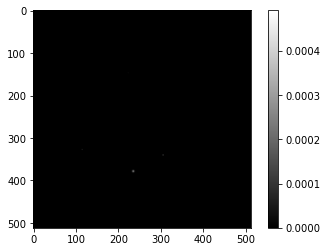

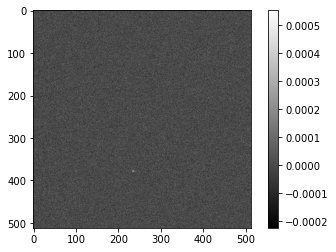

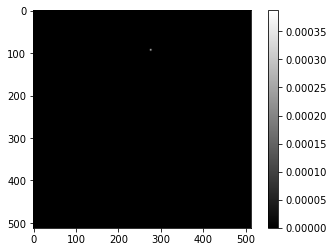

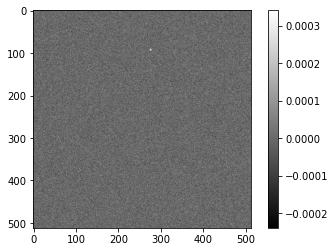

In [37]:
folder = "toy_data"
save_data = False

if not os.path.exists(f"{project_folder}/{folder}"):
    os.mkdir(f"{project_folder}/{folder}")
    
if not os.path.exists(f"{project_folder}/{folder}/dirty"):
    os.mkdir(f"{project_folder}/{folder}/dirty")
if not os.path.exists(f"{project_folder}/{folder}/true"):
    os.mkdir(f"{project_folder}/{folder}/true")
    
phase_centers = {}
keys_list = []
sky_sources_info = {}

noise_std = 5e-5
img_multiplier =  1e-5

for i in range(0, 2):
    image = np.zeros((512, 512))
    
    key = f"{i:06}" #could be any unique string
    keys_list.append(key)
    sky_sources_info[key] = []
    
    #generate random RA, DEC
    ra_min = 149.43959
    ra_max = 150.756584
    
    dec_min = 1.555417
    dec_max = 2.880238
    
    ra = random.uniform(ra_min, ra_max)
    dec = random.uniform(dec_min, dec_max)
    
    phase_centers[key] = {"RA" : ra, "DEC" : dec,}
    
    # Add three Gaussians with random mean values and std_dev
    for _ in range(np.random.randint(1, 5)):
        mean_x, mean_y, std_dev, max_value = generate_random_params()
        max_value = max_value*img_multiplier
        image_before = image.copy()  # Store the image before adding the Gaussian
        image = add_gaussian(image, mean_x, mean_y, std_dev, max_value)
        
        std_dev = 0.1*2.3548*std_dev
        
        flux = np.sum(image - image_before)  # Compute flux as sum of all the pixel values in the Gaussian
        SNR = max_value/noise_std
        
        beam_maj = 0.89
        beam_min = 0.82
        s_min = std_dev
        s_max = std_dev
        SNR_normalized = SNR*(beam_maj*beam_min)/np.sqrt((beam_maj**2+s_max**2)*(beam_min**2+s_min**2))

        sky_sources_info[key].append([
            ra,
            dec,
            SNR,
            SNR_normalized,
            flux,
            std_dev,
            std_dev,
        ])

    # Scale the array so that its maximum is around 10**(-5)
    filename = f"{i:06}.npy"
    
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    if save_data:
        np.save(f"/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/true/{filename}", image)
    
    # Add Gaussian noise on top
    noise = np.random.normal(0, noise_std, image.shape)
    image += noise
    if save_data:
        np.save(f"/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/dirty/{filename}", image)
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    
if save_data:
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/ra_dec.npy", phase_centers)
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/sky_keys.npy", keys_list)
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/sky_sources_snr_extended.npy", sky_sources_info)    



# Mock simulated real data

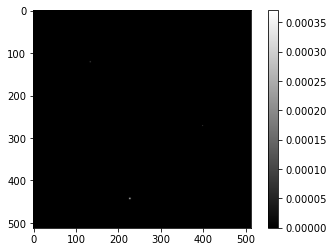

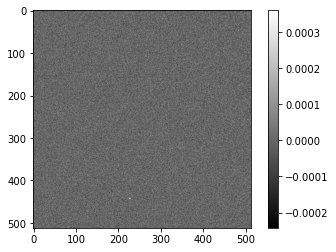

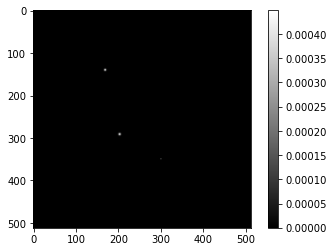

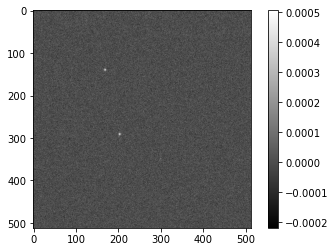

In [39]:
folder = "toy_real_data"
save_data = False

if not os.path.exists(f"{project_folder}/{folder}"):
    os.mkdir(f"{project_folder}/{folder}")
    
if not os.path.exists(f"{project_folder}/{folder}/dirty"):
    os.mkdir(f"{project_folder}/{folder}/dirty")
    
phase_centers = {}
keys_list = []
sky_sources_info = {}

noise_std = 5e-5
img_multiplier =  1e-5

for i in range(0, 2):
    image = np.zeros((512, 512))
    
    key = f"{i:06}" #could be any unique string
    keys_list.append(key)
    sky_sources_info[key] = []
    
    #generate random RA, DEC
    ra_min = 149.43959
    ra_max = 150.756584
    
    dec_min = 1.555417
    dec_max = 2.880238
    
    ra = random.uniform(ra_min, ra_max)
    dec = random.uniform(dec_min, dec_max)
    
    phase_centers[key] = {"RA" : ra, "DEC" : dec,}
    
    # Add three Gaussians with random mean values and std_dev
    for _ in range(np.random.randint(1, 5)):
        mean_x, mean_y, std_dev, max_value = generate_random_params()
        max_value = max_value*img_multiplier
        image_before = image.copy()  # Store the image before adding the Gaussian
        image = add_gaussian(image, mean_x, mean_y, std_dev, max_value)
        
        std_dev = 0.1*2.3548*std_dev
        
        flux = np.sum(image - image_before)  # Compute flux as sum of all the pixel values in the Gaussian
        SNR = max_value/noise_std
        
        beam_maj = 0.89
        beam_min = 0.82
        s_min = std_dev
        s_max = std_dev
        SNR_normalized = SNR*(beam_maj*beam_min)/np.sqrt((beam_maj**2+s_max**2)*(beam_min**2+s_min**2))

        sky_sources_info[key].append([
            ra,
            dec,
            SNR,
            SNR_normalized,
            flux,
            std_dev,
            std_dev,
        ])

    # Scale the array so that its maximum is around 10**(-5)
    filename = f"{i:06}.npy"
    
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()

    # Add Gaussian noise on top
    noise = np.random.normal(0, noise_std, image.shape)
    image += noise
    
    if save_data:
        np.save(f"{project_folder}/{folder}/dirty/{filename}", image)
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    
if save_data:  
    np.save(f"{project_folder}/{folder}/ra_dec.npy", phase_centers)
    np.save(f"{project_folder}/{folder}//sky_keys.npy", keys_list)
